In [269]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [270]:
#글꼴
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [271]:
from matplotlib import font_manager, rc
plt.rc('font', family='NanumBarunGothic')

In [272]:
data = '/content/drive/MyDrive/data'

In [273]:
Air = pd.read_csv(f'{data}/Co2.csv', encoding="cp949")
Air

,년도,구 분,이산화탄소 (CO2),메탄 (CH4),아산화질소(N2O)
0,2012,서 울,12585,93,309
1,2012,부 산,6248,24,140
2,2012,대 구,4088,21,85
3,2012,인 천,4594,23,98
4,2012,광 주,2036,7,37
...,...,...,...,...,...
182,2022,전 북,2656,3,29
183,2022,전 남,3837,4,42
184,2022,경 북,3979,3,43
185,2022,경 남,5094,5,53


In [274]:
Air = Air.drop(["메탄 (CH4)",	"아산화질소(N2O)"], axis=1)

In [275]:
Air

,년도,구 분,이산화탄소 (CO2)
0,2012,서 울,12585
1,2012,부 산,6248
2,2012,대 구,4088
3,2012,인 천,4594
4,2012,광 주,2036
...,...,...,...
182,2022,전 북,2656
183,2022,전 남,3837
184,2022,경 북,3979
185,2022,경 남,5094


In [276]:
Air_group = Air.groupby('구 분').agg(co2Mean = ('이산화탄소 (CO2)', 'mean'))\
.reset_index().sort_values(by='구 분', ascending=True)

In [277]:
Air_group

,구 분,co2Mean
0,강 원,2235.636364
1,경 기,18527.818182
2,경 남,5992.545455
3,경 북,4503.636364
4,광 주,2414.000000
5,대 구,8044.545455
6,대 전,2494.727273
7,부 산,6282.272727
8,서 울,11637.454545
9,세 종,385.200000


In [278]:
Air_group.drop([10], inplace=True)

In [279]:
Air_group

,구 분,co2Mean
0,강 원,2235.636364
1,경 기,18527.818182
2,경 남,5992.545455
3,경 북,4503.636364
4,광 주,2414.000000
5,대 구,8044.545455
6,대 전,2494.727273
7,부 산,6282.272727
8,서 울,11637.454545
9,세 종,385.200000


In [280]:
Air_group = Air_group.reset_index()

In [281]:
Air_group

,index,구 분,co2Mean
0,0,강 원,2235.636364
1,1,경 기,18527.818182
2,2,경 남,5992.545455
3,3,경 북,4503.636364
4,4,광 주,2414.000000
5,5,대 구,8044.545455
6,6,대 전,2494.727273
7,7,부 산,6282.272727
8,8,서 울,11637.454545
9,9,세 종,385.200000


In [282]:
Air_group = Air_group.drop(['index'], axis=1)

In [283]:
Fire = pd.read_csv(f'{data}/Fire_area.csv', encoding='utf8')
Fire

,시도별(1),시점,건수 (건),면적 (ha)
0,시도별(1),시점,금년,금년
1,서울특별시,2012,12,3.03
2,서울특별시,2013,4,0.10
3,서울특별시,2014,19,1.01
4,서울특별시,2015,21,1.69
...,...,...,...,...
191,경상남도,2023,61,337.75
192,제주특별자치도,2012,1,0.50
193,제주특별자치도,2013,2,1.50
194,제주특별자치도,2020,2,1.88


In [284]:
Fire = Fire.drop([0])

In [285]:
Fire

,시도별(1),시점,건수 (건),면적 (ha)
1,서울특별시,2012,12,3.03
2,서울특별시,2013,4,0.10
3,서울특별시,2014,19,1.01
4,서울특별시,2015,21,1.69
5,서울특별시,2016,13,1.04
...,...,...,...,...
191,경상남도,2023,61,337.75
192,제주특별자치도,2012,1,0.50
193,제주특별자치도,2013,2,1.50
194,제주특별자치도,2020,2,1.88


In [286]:
Fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 1 to 195
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   시도별(1)   195 non-null    object
 1   시점       195 non-null    object
 2   건수 (건)   195 non-null    object
 3   면적 (ha)  195 non-null    object
dtypes: object(4)
memory usage: 6.2+ KB


In [287]:
Fire['시점'] = Fire['시점'].astype('float')
Fire['건수 (건)'] = Fire['건수 (건)'].astype('float')
Fire['면적 (ha)'] = Fire['면적 (ha)'].astype('float')

In [288]:
Fire

,시도별(1),시점,건수 (건),면적 (ha)
1,서울특별시,2012.0,12.0,3.03
2,서울특별시,2013.0,4.0,0.10
3,서울특별시,2014.0,19.0,1.01
4,서울특별시,2015.0,21.0,1.69
5,서울특별시,2016.0,13.0,1.04
...,...,...,...,...
191,경상남도,2023.0,61.0,337.75
192,제주특별자치도,2012.0,1.0,0.50
193,제주특별자치도,2013.0,2.0,1.50
194,제주특별자치도,2020.0,2.0,1.88


In [289]:
Fire_group = Fire.groupby(['시도별(1)']).agg(mean = ('건수 (건)', 'mean'), mean_area = ('면적 (ha)', 'mean'))\
.reset_index().sort_values(by='시도별(1)', ascending=True)

In [290]:
Fire_group

,시도별(1),mean,mean_area
0,강원특별자치도,72.000000,919.950833
1,경기도,106.500000,41.905000
2,경상남도,47.166667,170.533333
3,경상북도,82.666667,1769.295000
4,광주광역시,3.750000,0.727500
5,대구광역시,9.416667,12.224167
6,대전광역시,6.916667,1.852500
7,부산광역시,13.416667,15.116667
8,서울특별시,10.666667,1.765000
9,세종특별자치시,4.454545,1.337273


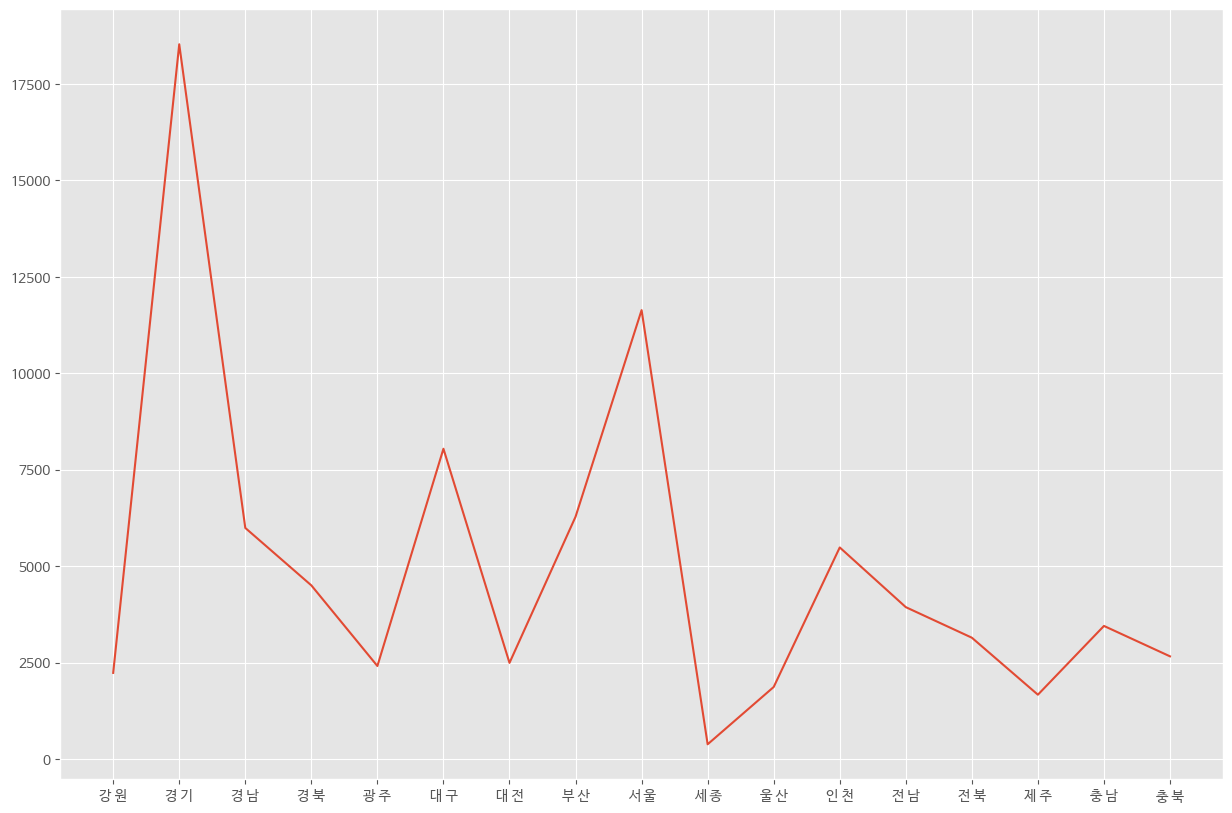

In [291]:
plt.figure(figsize=(15,10))
plt.plot(Air_group['구 분'], Air_group['co2Mean'])

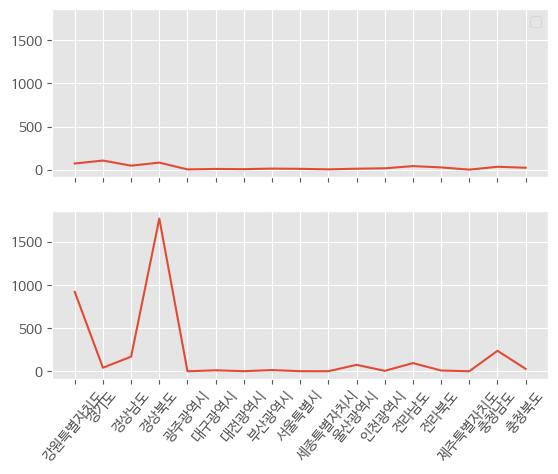

In [292]:
plt.style.use('ggplot')
fig, ax = plt.subplots(2,1, sharex=True, sharey=True)
plt.xticks(rotation=50)

plt.subplot(2,1,1)
plt.plot(Fire_group['시도별(1)'], Fire_group['mean'])
plt.legend()

plt.subplot(2,1,2)
plt.plot(Fire_group['시도별(1)'], Fire_group['mean_area'])

In [293]:
merged = pd.concat([Fire_group, Air_group], axis=1)

In [294]:
merged

,시도별(1),mean,mean_area,구 분,co2Mean
0,강원특별자치도,72.000000,919.950833,강 원,2235.636364
1,경기도,106.500000,41.905000,경 기,18527.818182
2,경상남도,47.166667,170.533333,경 남,5992.545455
3,경상북도,82.666667,1769.295000,경 북,4503.636364
4,광주광역시,3.750000,0.727500,광 주,2414.000000
5,대구광역시,9.416667,12.224167,대 구,8044.545455
6,대전광역시,6.916667,1.852500,대 전,2494.727273
7,부산광역시,13.416667,15.116667,부 산,6282.272727
8,서울특별시,10.666667,1.765000,서 울,11637.454545
9,세종특별자치시,4.454545,1.337273,세 종,385.200000


In [295]:
merged.drop(['구 분'], axis=1, inplace=True)

In [296]:
merged

,시도별(1),mean,mean_area,co2Mean
0,강원특별자치도,72.000000,919.950833,2235.636364
1,경기도,106.500000,41.905000,18527.818182
2,경상남도,47.166667,170.533333,5992.545455
3,경상북도,82.666667,1769.295000,4503.636364
4,광주광역시,3.750000,0.727500,2414.000000
5,대구광역시,9.416667,12.224167,8044.545455
6,대전광역시,6.916667,1.852500,2494.727273
7,부산광역시,13.416667,15.116667,6282.272727
8,서울특별시,10.666667,1.765000,11637.454545
9,세종특별자치시,4.454545,1.337273,385.200000


In [297]:
merged[['mean', 'mean_area', 'co2Mean']].corr()

,mean,mean_area,co2Mean
mean,1.000000,0.602963,0.497235
mean_area,0.602963,1.000000,-0.102994
co2Mean,0.497235,-0.102994,1.000000


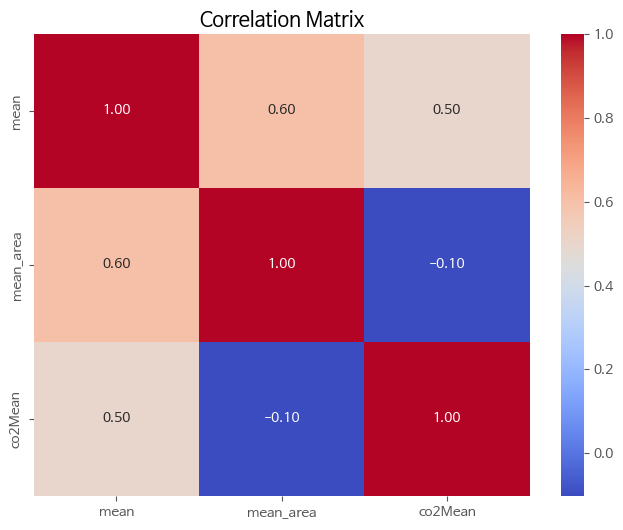

In [298]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 행렬 계산
corr_matrix = merged[['mean', 'mean_area', 'co2Mean']].corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')  # 그래프 제목 설정
plt.show()